In [1]:
import pandas as pd
import numpy as np
import tensorflow
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import io
import requests
import os
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
print('done')


done


In [4]:

path='kddcup.data.txt'

column_names = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

df = pd.read_csv(path, header=None, names=column_names,on_bad_lines='warn',skiprows=1)
pd.set_option('display.max_columns', 42)

df.head(5)


Skipping line 4817100: expected 42 fields, saw 56



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898429 entries, 0 to 4898428
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [7]:
df.shape

(4898429, 42)

In [8]:

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        # Convert to numeric data type, replacing non-convertible values with NaN
        df[name] = pd.to_numeric(df[name], errors='coerce')
        mean = df[name].mean()
    if sd is None:
        # Convert to numeric data type, replacing non-convertible values with NaN
        df[name] = pd.to_numeric(df[name], errors='coerce')
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd


def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
print('done')

done


In [9]:
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_text_dummy(df, 'land')
encode_text_dummy(df, 'logged_in')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
print('done')

done


In [10]:
encode_numeric_zscore(df, 'duration')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')
print("done")

done


In [11]:
df.dropna(inplace=True,axis=1)
print('done')


done


In [14]:
object_columns = df.select_dtypes(include=['object']).columns

print(object_columns)

Index(['outcome'], dtype='object')


In [15]:
# Create binary outcome variable
df['outcome_binary'] = np.where(df['outcome'] == 'normal.', 0, 1)
df['outcome_binary'].value_counts()

C:\Users\teo22\AppData\Local\Temp\ipykernel_16044\2251080966.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['outcome_binary'] = np.where(df['outcome'] == 'normal.', 0, 1)


outcome_binary
1    3925650
0     972779
Name: count, dtype: int64

In [16]:
df = df.drop('outcome', axis=1)


In [17]:
#BINARY MODEL

# Convert to numpy - Binary Classification
x_columns = df.columns.drop('outcome_binary','outcome')
x = df[x_columns].values.astype(np.float32)
y = df['outcome_binary'].values.astype(np.float32)

print('done')

done


In [18]:
y.shape

(4898429,)

In [19]:
x.shape

(4898429, 125)

In [20]:
unique_values, counts = np.unique(y, return_counts=True)

# Count the number of unique values
num_unique_values = len(unique_values)

# Print the number of unique values
print("Number of unique values:", num_unique_values)

Number of unique values: 2


In [21]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y,shuffle=True)
print('done')

done


In [22]:
#BINARY CLASSIFICATION NN 
modelb = Sequential()
modelb.add(Dense(21, input_dim=x.shape[1], activation='tanh'))
modelb.add(Dropout(0.2, noise_shape=(None, 21))) # Inverted Dropout

modelb.add(Dense(21, input_dim=x.shape[1], activation='tanh'))
modelb.add(Dropout(0.2, noise_shape=(None, 21))) # Inverted Dropout


modelb.add(Dense(1,activation='sigmoid'))


modelb.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)
modelb.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = 32, callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
122461/122461 - 103s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 0.9997 - 103s/epoch - 841us/step
Epoch 2/100
122461/122461 - 105s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9998 - 105s/epoch - 858us/step
Epoch 3/100
122461/122461 - 102s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9997 - 102s/epoch - 830us/step
Epoch 4/100
122461/122461 - 104s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9998 - 104s/epoch - 850us/step
Epoch 5/100
122461/122461 - 102s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9997 - 102s/epoch - 833us/step
Epoch 6/100
Restoring model weights from the end of the best epoch: 1.
122461/122461 - 103s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 9.4102e-04 - val_accuracy: 0.9998 - 103s/epoch - 837us/step
Epoch 6: early stopping


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.001, random_state=1, verbose=2)
print("starting training...")
# Train the classifier on the training data
rf_clf.fit(x_train, y_train)
print('starting predictions...')


starting training...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished


In [34]:
# Make predictions on the testing data
y_pred_rf = rf_clf.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [25]:
y_pred_rf.shape

(979686,)

In [26]:
y_test.shape

(979686,)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_pred_rf, y_test)

# # Calculate precision
precision = precision_score(y_pred_rf, y_test, average='macro')

# # Calculate recall
recall = recall_score(y_pred_rf, y_test, average='macro')

# # Calculate F1 score
f1 = f1_score(y_pred_rf, y_test, average='macro')

print("RF Accuracy:", accuracy)
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1 score:", f1)

RF Accuracy: 0.9984872704111317
RF Precision: 0.9988957585462535
RF Recall: 0.9963758439956611
RF F1 score: 0.9976297906509832


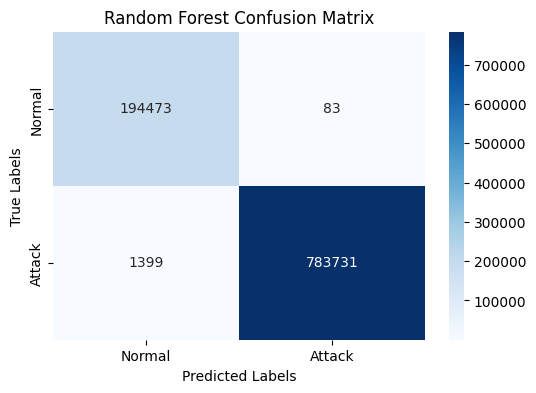

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)


class_labels=["Normal","Attack"]

# Print the confusion matrix
# print("Confusion Matrix:")
# print(cm)
# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_labels, yticklabels=class_labels)

# Set plot labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [30]:
y_pred_nn = modelb.predict(x_test)
y_pred_nn=y_pred_nn.flatten()

30616/30616 [==============================] - 15s 492us/step


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

threshold = 0.5

y_pred_nn = [1 if pred >= threshold else 0 for pred in y_pred_nn]


# Calculate accuracy
accuracy = accuracy_score( y_test,y_pred_nn,)

# # Calculate precision
precision = precision_score( y_test,y_pred_nn, average='macro')

# # Calculate recall
recall = recall_score( y_test,y_pred_nn, average='macro')

# # Calculate F1 score
f1 = f1_score( y_test,y_pred_nn, average='macro')

print("MLP Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1 score:", f1)


MLP Accuracy: 0.9996794891424395
MLP Precision: 0.9994868883362885
MLP Recall: 0.9995061993406025
MLP F1 score: 0.9994965434882215


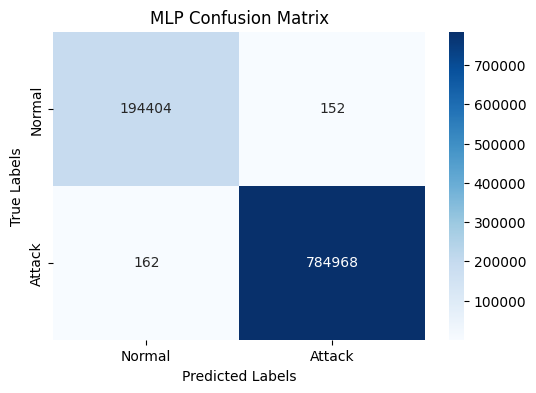

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)


class_labels=["Normal","Attack"]


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_labels, yticklabels=class_labels)

# Set plot labels
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()